In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

Least Squares: loss*=0.04396742864168486, w0*=[ 0.51], w1*=[ 0.15239299]


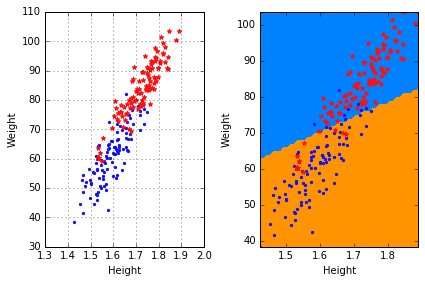

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
    mse, w = least_squares(y,tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [11]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1/(1+np.exp(-t))

In [12]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    return np.sum(np.log(1+np.exp(tx.dot(w))) - y*tx.dot(w))

In [98]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot((sigmoid(tx.dot(w))-y))

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [99]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """

    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    w -= alpha*grad
    
    return loss, w

Demo!

Current iteration=0, the loss=138.62943611198904
Current iteration=1000, the loss=43.49258275203994
Current iteration=2000, the loss=41.55453651737652
Current iteration=3000, the loss=41.10170781312696
Current iteration=4000, the loss=40.96605044352832
Current iteration=5000, the loss=40.92056155503627
Current iteration=6000, the loss=40.904380183565806
Current iteration=7000, the loss=40.89842938170658
Current iteration=8000, the loss=40.89619782090304
Current iteration=9000, the loss=40.895351126990754
The loss=40.89502757990701


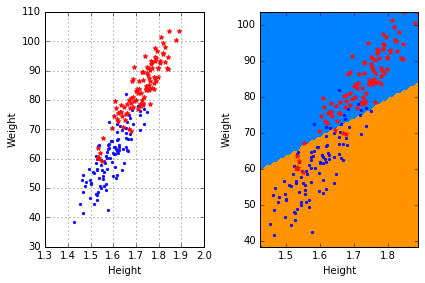

In [100]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [103]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    #TODO does not work!
    #return np.sum(tx.dot(tx.T)*sigmoid(tx.T.dot(w)).dot(np.ones(len(y))-sigmoid(tx.T.dot(w))))
    a = tx.T.dot(tx)
    b1 = np.ones(len(y))-sigmoid(tx.dot(w).T)
    b = sigmoid(tx.dot(w)).T.dot(b1.T)
    return a*b

Write a function below to return loss, gradient, and hessian.

In [104]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    hess = calculate_hessian(y, tx, w)
    return loss, grad, hess

### Using Newton method
Use Newton method for logistic regression.

In [106]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = logistic_regression(y,tx,w)
    w -= alpha * np.linalg.inv(hess).dot(grad);
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=500, the loss=135.46733624247963
Current iteration=1000, the loss=132.4570563611555
Current iteration=1500, the loss=129.58904676572496
Current iteration=2000, the loss=126.85447090566328
Current iteration=2500, the loss=124.24514709747147
Current iteration=3000, the loss=121.75349501975231
Current iteration=3500, the loss=119.37248664281525
Current iteration=4000, the loss=117.09560126311409
Current iteration=4500, the loss=114.91678432878945
Current iteration=5000, the loss=112.83040975899956
Current iteration=5500, the loss=110.83124547650814
Current iteration=6000, the loss=108.91442189001047
Current iteration=6500, the loss=107.07540307974409
Current iteration=7000, the loss=105.30996045684356
Current iteration=7500, the loss=103.6141486834851
Current iteration=8000, the loss=101.98428365695497
Current iteration=8500, the loss=100.4169223762334
Current iteration=9000, the loss=98.90884452441324
Current iteration=95

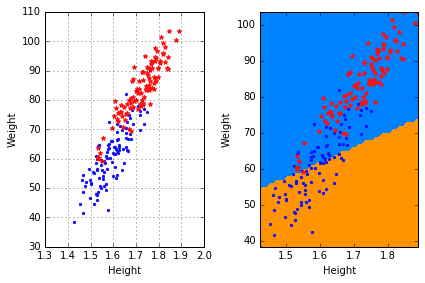

In [107]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)